## Image approximation with orthogonal basis

Given the following RGB image and its gray scale rendering, stored as
matrices of size (m,nm,3) and (m,n) respectively, we compute an approximation 
of the gray scale matrix using an orthogonal basis for the  column space.

shape original image (768, 1024, 3)


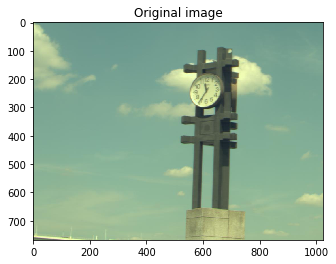

shape gray scale image (768, 1024)


Text(0.5, 1.0, 'Gray scale  image')

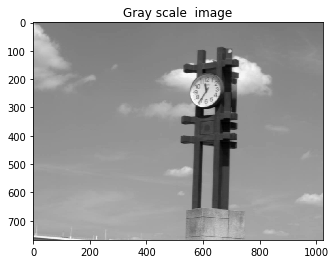

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
img=mpimg.imread('0002.jpg')
print('shape original image',img.shape)
imgplot = plt.imshow(img)
plt.title('Original image')
plt.show()
# gray scale computation
rgb_weights = [0.2989, 0.5870, 0.1140]
imgg=np.dot(img,rgb_weights)
print('shape gray scale image',imgg.shape)
imgplot = plt.imshow(imgg,cmap=plt.get_cmap("gray"))
plt.title('Gray scale  image')

To perform the qr factorization we use the scipy routine qr
of the  modulus linalg with pivoting true in order to have 
the elements of the rectangular matrix ordered:
    
[Qimg,Rimg,Pimg]=spl.qr(imgg,pivoting=True)

note that Pimg contains the index of the permuted columns 
of imgg and the algorithm find an orthogonal matrix
Qimg and a rectangular matrix Rimg such that 
imgg[:,Pimg]=Qimg*Rimg

print the norm of the the residual imgg[:,Pimg]-Qimg*Rimg


In [361]:
[Qimg,Rimg,Pimg]=spl.qr(imgg,pivoting=True)

Given the tolerances 1e-1,5e-2,1e-2,5e-3 compute an approximation
of the matrix imgg by choosing only nc  columns of the matrix Qimg
and nc rows of the matrix Rimg, where nc is chosen 
by computing: 

  1) extract the diagonal elements of Rimg and copy in Rdiag
    
  2) scale the absolute values of Rdiag with respect to its absolute maximum
    
  3) compute nc as  the number of elements of Rdiag that are less of the chosen tolerance
    
plot the approximate images in gray scale and comment the results

# Text retrieval

Given the  term-document matrix A and the two query vectors defined in the following code, compute the cosine similarity 
beetwen the query vectors and the matrix A and find  which documents are meaningful for the  given query.  Define an additional query and analyze the result.

In [397]:
import sklearn
import sklearn.feature_extraction
np.set_printoptions(suppress=True)
vectorizer = sklearn.feature_extraction.text.CountVectorizer(min_df=1)
documents = [
'The rank of a matrix is the maximum number of linearly independent columns.',
'The column space of a matrix A is called range of A.',
'The two norm of a vector is called Euclidean norm.',
'The function norm satisfies the triangular inequality.',
'The inverse of an orthogonal matrix is its transpose.',
'The product of an orthogonal matrix and its traspose is the identity matrix.',
'The matrix vector product is not commutative',
'The rank of a matrix is the maximum number of  linearly independent rows.',
'A set of orthogonal vectors is a linearly independent set.',
'The columns of an orthogonal matrix are a set of orthogonal vectors.',
'A normed vectorial space is a space with an inner product norm.',
'An inner product space is a vectorial space with an inner product',
'A norm can be induced by an inner product.']

X = vectorizer.fit_transform(documents).toarray()
print('vectorizer.vocabulary_: {0}'.format(vectorizer.vocabulary_))
A=X.T
# query vectors
query1text = ['rank of a matrix?']
query1 = vectorizer.transform(query1text).toarray()
query1 = query1.T
query2text = ['euclidean norm']
query2 = vectorizer.transform(query2text).toarray()
query2 = query2.T

vectorizer.vocabulary_: {'the': 36, 'rank': 31, 'of': 27, 'matrix': 21, 'is': 18, 'maximum': 22, 'number': 26, 'linearly': 20, 'independent': 13, 'columns': 8, 'column': 7, 'space': 35, 'called': 5, 'range': 30, 'two': 40, 'norm': 23, 'vector': 41, 'euclidean': 10, 'function': 11, 'satisfies': 33, 'triangular': 39, 'inequality': 15, 'inverse': 17, 'an': 0, 'orthogonal': 28, 'its': 19, 'transpose': 37, 'product': 29, 'and': 1, 'traspose': 38, 'identity': 12, 'not': 25, 'commutative': 9, 'rows': 32, 'set': 34, 'vectors': 43, 'are': 2, 'normed': 24, 'vectorial': 42, 'with': 44, 'inner': 16, 'can': 6, 'be': 3, 'induced': 14, 'by': 4}


Compute the QR factorization, with pivoting true,  of the scaled term-document matrix and use the QR factors to compute the cosine similarity. Compute an approximation of the term-document matrix by using nc columns of Q and nc rows of R (as in the first exercise). Use this approximation to compute again the cosine similarity and comment the results.

## Linear correlation

Given the following array that contains in the first column the total paid 
for gas and in the second column the corresponding driven Kilometers, verify if the two vector are linearly correlated.

Text(0.5, 1.0, 'Kilometers - Total paid')

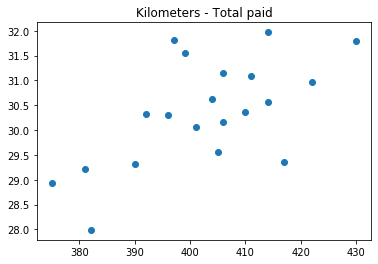

In [398]:
# X[:,0] total paid
# X[:,1] km driven
X=np.array([[ 30.96,         422],
        [29.35,         417],
        [28.93,         375],
        [29.56,         405],
        [30.63,         404],
        [31.09,         411],
        [31.80,         430],
        [30.17,         406],
        [30.57,         414],
        [31.14,         406],
        [30.33,         392],
        [31.81,         397],
        [31.97,         414],
        [30.30,         396],
        [30.36,         410],
        [29.22,         381],
        [29.32,         390],
        [31.56,         399],
        [30.06,         401],
        [27.99,         382]])
plt.plot(X[:,1],X[:,0],'o')
plt.title('Kilometers - Total paid')

Compute the coefficients of the correlations line:

y = beta_0  + beta_1 x 

where x are the Total paid and y the  Kilometers.

Given this line compute the  line:

x = -beta_0/beta_1 + 1/beta_1 y

plot the correlation line, the given data, and the value 
of Total paid needed to drive 460 Km and comment the results.